In [1]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading data from csv file
train_data = pd.read_csv('train.csv')
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
#checking missing value
train_data.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
train_data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [6]:
#filling null value
train_data.Gender = train_data.Gender.fillna('Male')

In [7]:
train_data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [8]:
train_data.Married = train_data.Married.fillna('Yes')

In [9]:
train_data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [10]:
train_data.Dependents = train_data.Dependents.fillna('0')

In [11]:
train_data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [12]:
train_data.Self_Employed = train_data.Self_Employed.fillna('No')

In [13]:
#loan amount is continous value so using mean value for replace
train_data.LoanAmount = train_data.LoanAmount.fillna(train_data.LoanAmount.mean())

In [14]:
train_data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [15]:
train_data.Loan_Amount_Term = train_data.Loan_Amount_Term.fillna(360.0)

In [16]:
train_data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [17]:
train_data.Credit_History = train_data.Credit_History.fillna(1.0)

In [18]:
train_data.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
#preprocessing data for using model
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    train_data[i] = le.fit_transform(train_data[i])
train_data.head() 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [20]:
#attribute use for training data
X_train = train_data[['Credit_History','Gender','Married','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Property_Area']]
y_train = train_data['Loan_Status']

In [21]:
from sklearn import decomposition
pca= decomposition.PCA()

In [22]:
pca.n_components=2
X_train1=pca.fit_transform(X_train)


In [23]:
X_train1=np.vstack((X_train1.T,y_train)).T
X1=pd.DataFrame(data=X_train1,columns=("1st","2nd","Loan_Status"))
y = y_train

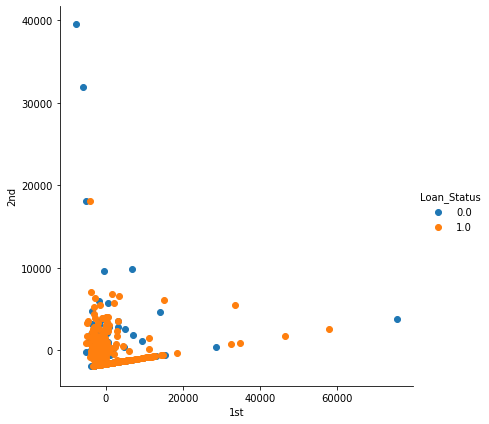

In [24]:
#visualization of data with max two variances
sns.FacetGrid(X1,hue="Loan_Status",size=6).map(plt.scatter,"1st","2nd").add_legend()
plt.show()

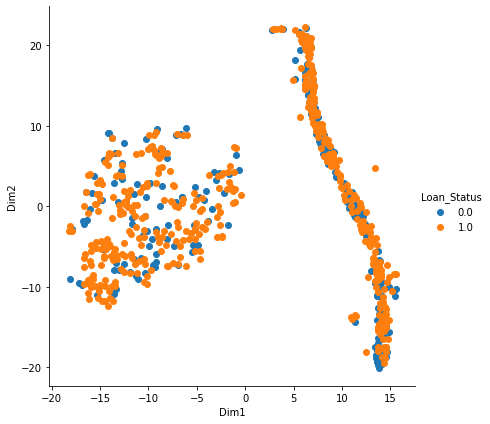

In [25]:
from sklearn.manifold import TSNE
#visualization of data with max two variances using TSNE
#model
model=TSNE(n_components=2,random_state=0,perplexity=50,n_iter=5000)
tsne_data=model.fit_transform(X_train)
#by default perplextiy=30,itration=1000 and learning rate=200

#visiuliaze
tnse_data=np.vstack((tsne_data.T,y_train)).T
tnse_df=pd.DataFrame(data=tnse_data,columns=("Dim1","Dim2","Loan_Status"))
#plotting
sns.FacetGrid(tnse_df,hue="Loan_Status",size=6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.show()

In [26]:
pca= decomposition.PCA()
pca.n_components=4
X_train=pca.fit_transform(X_train)
X_train=np.vstack((X_train.T)).T
X=pd.DataFrame(data=X_train,columns=("1st","2nd","3rd","4th"))

In [27]:
#splliting dataset
from sklearn.model_selection import train_test_split
X_df, X_test, y_df, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
#### LOGISTIC REGRESSION CLASSIFIER ######

In [29]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)

In [30]:
from sklearn.model_selection import cross_val_score
#using k-fold cross validation
scores = cross_val_score(classifier, X_df, y_df, cv=5)
scores

array([0.66666667, 0.68367347, 0.67346939, 0.67346939, 0.66326531])

In [31]:
print("Cross_val_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross_val_Accuracy: 0.67 (+/- 0.01)


In [32]:
classifier.fit(X_df, y_df)
y_pred = classifier.predict(X_test)

In [33]:
from sklearn import metrics
print('The accuracy of logisitc regression is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of logisitc regression is:  0.7398373983739838


In [34]:
#### KNN CLASSIFIER ######

In [35]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski', p = 2)

In [36]:
scores = cross_val_score(classifier, X_df, y_df, cv=5)
scores

array([0.6969697 , 0.70408163, 0.68367347, 0.64285714, 0.65306122])

In [37]:
print("Cross_val_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross_val_Accuracy: 0.68 (+/- 0.05)


In [38]:
classifier.fit(X_df, y_df)
y_pred = classifier.predict(X_test)

In [39]:
print('The accuracy of KNN is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of KNN is:  0.6747967479674797


In [40]:
#### SVC CLASSIFIER (with poloynomial degree 3)######

In [41]:
#cubic svm
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', degree=3, random_state = 0)

In [42]:
scores = cross_val_score(classifier, X_df, y_df, cv=5)
scores

array([0.66666667, 0.67346939, 0.67346939, 0.67346939, 0.67346939])

In [43]:
print("Cross_val_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross_val_Accuracy: 0.67 (+/- 0.01)


In [44]:
classifier.fit(X_df, y_df)
y_pred = classifier.predict(X_test)

In [45]:
print('The accuracy of SVC is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of SVC is:  0.7398373983739838


In [46]:
#### NAIVE BEYES CLASSIFIER ######

In [47]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

In [48]:
scores = cross_val_score(classifier, X_df, y_df, cv=5)
scores

array([0.64646465, 0.68367347, 0.63265306, 0.65306122, 0.70408163])

In [49]:
print("Cross_val_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross_val_Accuracy: 0.66 (+/- 0.05)


In [50]:
classifier.fit(X_df, y_df)
y_pred = classifier.predict(X_test)

In [51]:
print('The accuracy of Navie Bayes is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Navie Bayes is:  0.7073170731707317


In [52]:
#### DECISION TREE CLASSIFIER ######

In [53]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [54]:
scores = cross_val_score(classifier, X_df, y_df, cv=5)
scores

array([0.58585859, 0.57142857, 0.57142857, 0.58163265, 0.54081633])

In [55]:
print("Cross_val_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross_val_Accuracy: 0.57 (+/- 0.03)


In [56]:
classifier.fit(X_df, y_df)
y_pred = classifier.predict(X_test)

In [57]:
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Decision Tree is:  0.6341463414634146


tropy = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(120.9556886227545, 22.649999999999977, 'X[1] <= -1689.013\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(118.28263473053892, 13.589999999999975, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(123.62874251497006, 13.589999999999975, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(128.9748502994012, 31.70999999999998, 'X[2] <= 2.134\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(126.30179640718563, 22.649999999999977, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(131.64790419161676, 22.649999999999977, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(126.30179640718563, 49.829999999999984, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(136.99401197604791, 58.889999999999986, 'X[3] <= 6.339\nentropy = 0.971\nsamples = 15\nvalue = [9, 6]'),
 Text(134.32095808383232, 49.829999999999984, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(139.66706586826348, 49.829999999999984, 'X[2] <= 14.087\ne

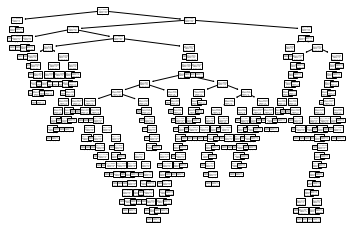

In [58]:
from sklearn import tree
#showing graphical tree classifier
classifier.fit(X, y)
tree.plot_tree(classifier)

In [59]:
#### RANDOM FOREST CLASSIFIER ######

In [60]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [61]:
scores = cross_val_score(classifier, X_df, y_df, cv=5)
scores

array([0.57575758, 0.62244898, 0.59183673, 0.63265306, 0.65306122])

In [62]:
print("Cross_val_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross_val_Accuracy: 0.62 (+/- 0.06)


In [63]:
classifier.fit(X_df, y_df)
y_pred = classifier.predict(X_test)

In [64]:
print('The accuracy of Random Forest is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Random Forest is:  0.6178861788617886


In [65]:
#### STOCHASTIC GRADIENT DESCENT CLASSIFIER ######

In [66]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
classifier = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3))

In [67]:
scores = cross_val_score(classifier, X_df, y_df, cv=5)
scores

array([0.65656566, 0.56122449, 0.60204082, 0.60204082, 0.60204082])

In [68]:
print("Cross_val_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross_val_Accuracy: 0.60 (+/- 0.06)


In [69]:
classifier.fit(X_df, y_df)
y_pred = classifier.predict(X_test)

In [70]:
print('The accuracy of XGD is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of XGD is:  0.5203252032520326


In [71]:
#### GRADIENT BOSSTING CLASSIFIER ######

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(random_state=0)

In [73]:
scores = cross_val_score(classifier, X_df, y_df, cv=5)
scores

array([0.57575758, 0.69387755, 0.63265306, 0.65306122, 0.62244898])

In [74]:
print("Cross_val_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross_val_Accuracy: 0.64 (+/- 0.08)


In [75]:
classifier.fit(X_df, y_df)
y_pred = classifier.predict(X_test)

In [76]:
print('The accuracy of GB is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of GB is:  0.7154471544715447
